In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
! pip install plotly

In [7]:
import plotly.figure_factory as ff

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [13]:
! pip install xgboost

In [14]:
from xgboost import XGBClassifier

In [15]:
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
import os

In [18]:
for dirname, _, filenames in os.walk('C:/Users/hp/Desktop/PythonProjects/Untitled Folder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/hp/Desktop/PythonProjects/Untitled Folder\data.csv
C:/Users/hp/Desktop/PythonProjects/Untitled Folder\Untitled.ipynb
C:/Users/hp/Desktop/PythonProjects/Untitled Folder\Untitled1.ipynb
C:/Users/hp/Desktop/PythonProjects/Untitled Folder\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:/Users/hp/Desktop/PythonProjects/Untitled Folder\.ipynb_checkpoints\Untitled1-checkpoint.ipynb


In [19]:
cancer = pd.read_csv('C:/Users/hp/Desktop/PythonProjects/Untitled Folder\data.csv')
cancer = cancer.drop('id', axis=1)
cancer.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
392         M        15.49         19.97          102.40      744.7   
85          M        18.46         18.52          121.10     1075.0   
147         B        14.95         18.77           97.84      689.5   
549         B        10.82         24.21           68.89      361.6   
94          M        15.06         19.83          100.30      705.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
392          0.11600           0.15620         0.18910              0.09113   
85           0.09874           0.10530         0.13350              0.08795   
147          0.08138           0.11670         0.09050              0.03562   
549          0.08192           0.06602         0.01548              0.00816   
94           0.10390           0.15530         0.17000              0.08815   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
392         0.1929  ...          29.41            142.1      1359.0   
85          0.2132  ...          27.68            152.2      1603.0   
147         0.1744  ...          25.47            107.1       809.7   
549         0.1976  ...          31.45             83.9       505.6   
94          0.1855  ...          24.23            123.5      1025.0   

     smoothness_worst  compactness_worst  concavity_worst  \
392            0.1681             0.3913          0.55530   
85             0.1398             0.2089          0.31570   
147            0.0997             0.2521          0.25000   
549            0.1204             0.1633          0.06194   
94             0.1551             0.4203          0.52030   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
392               0.21210          0.3187                  0.10190   
85                0.16420          0.3695                  0.08579   
147               0.08405          0.2852                  0.09218   
549               0.03264          0.3059                  0.07626   
94                0.21150          0.2834                  0.08234   

     Unnamed: 32  
392          NaN  
85           NaN  
147          NaN  
549          NaN  
94           NaN  

[5 rows x 32 columns]

In [20]:
def EDA(df):
        
    print('\033[1m' + 'Shape of the data :' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    print('\033[1m' + 'Summary statistics for the data' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Outliers in the data :' + '\033[0m')
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    print(outliers.sum(), 
          '\n------------------------------------------------------------------------------------\n')
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), '\n------------------------------------------------------------------------------------\n')
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(cancer)

Shape of the data :
(569, 32) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Dat

In [21]:
# Dropping Unnamed column
cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]

# Encoding target variable
cancer.diagnosis = cancer.diagnosis.astype('category')
cancer.diagnosis = cancer.diagnosis.cat.codes
cancer.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [22]:
cancer_mean = cancer.loc[:, 'radius_mean':'fractal_dimension_mean']
cancer_mean['diagnosis'] = cancer['diagnosis']

In [23]:
# Plotly's Scatterplot matrix

dimensions = []
for col in cancer_mean:
    dimensions.append(dict(label = col, values = cancer_mean[col]))
    
fig = go.Figure(data = go.Splom(
                dimensions = dimensions[:-2],
                showupperhalf=False,
                diagonal_visible=False,
                marker=dict(
                    color='rgba(135, 206, 250, 0.5)',
                    size=5,
                    line=dict(
                        color='MediumPurple',
                        width=0.5))
                ))
fig.update_layout(
    title='Pairplot for mean attributes of the dataset',
    width=1100,
    height=1500,
)

fig.show()

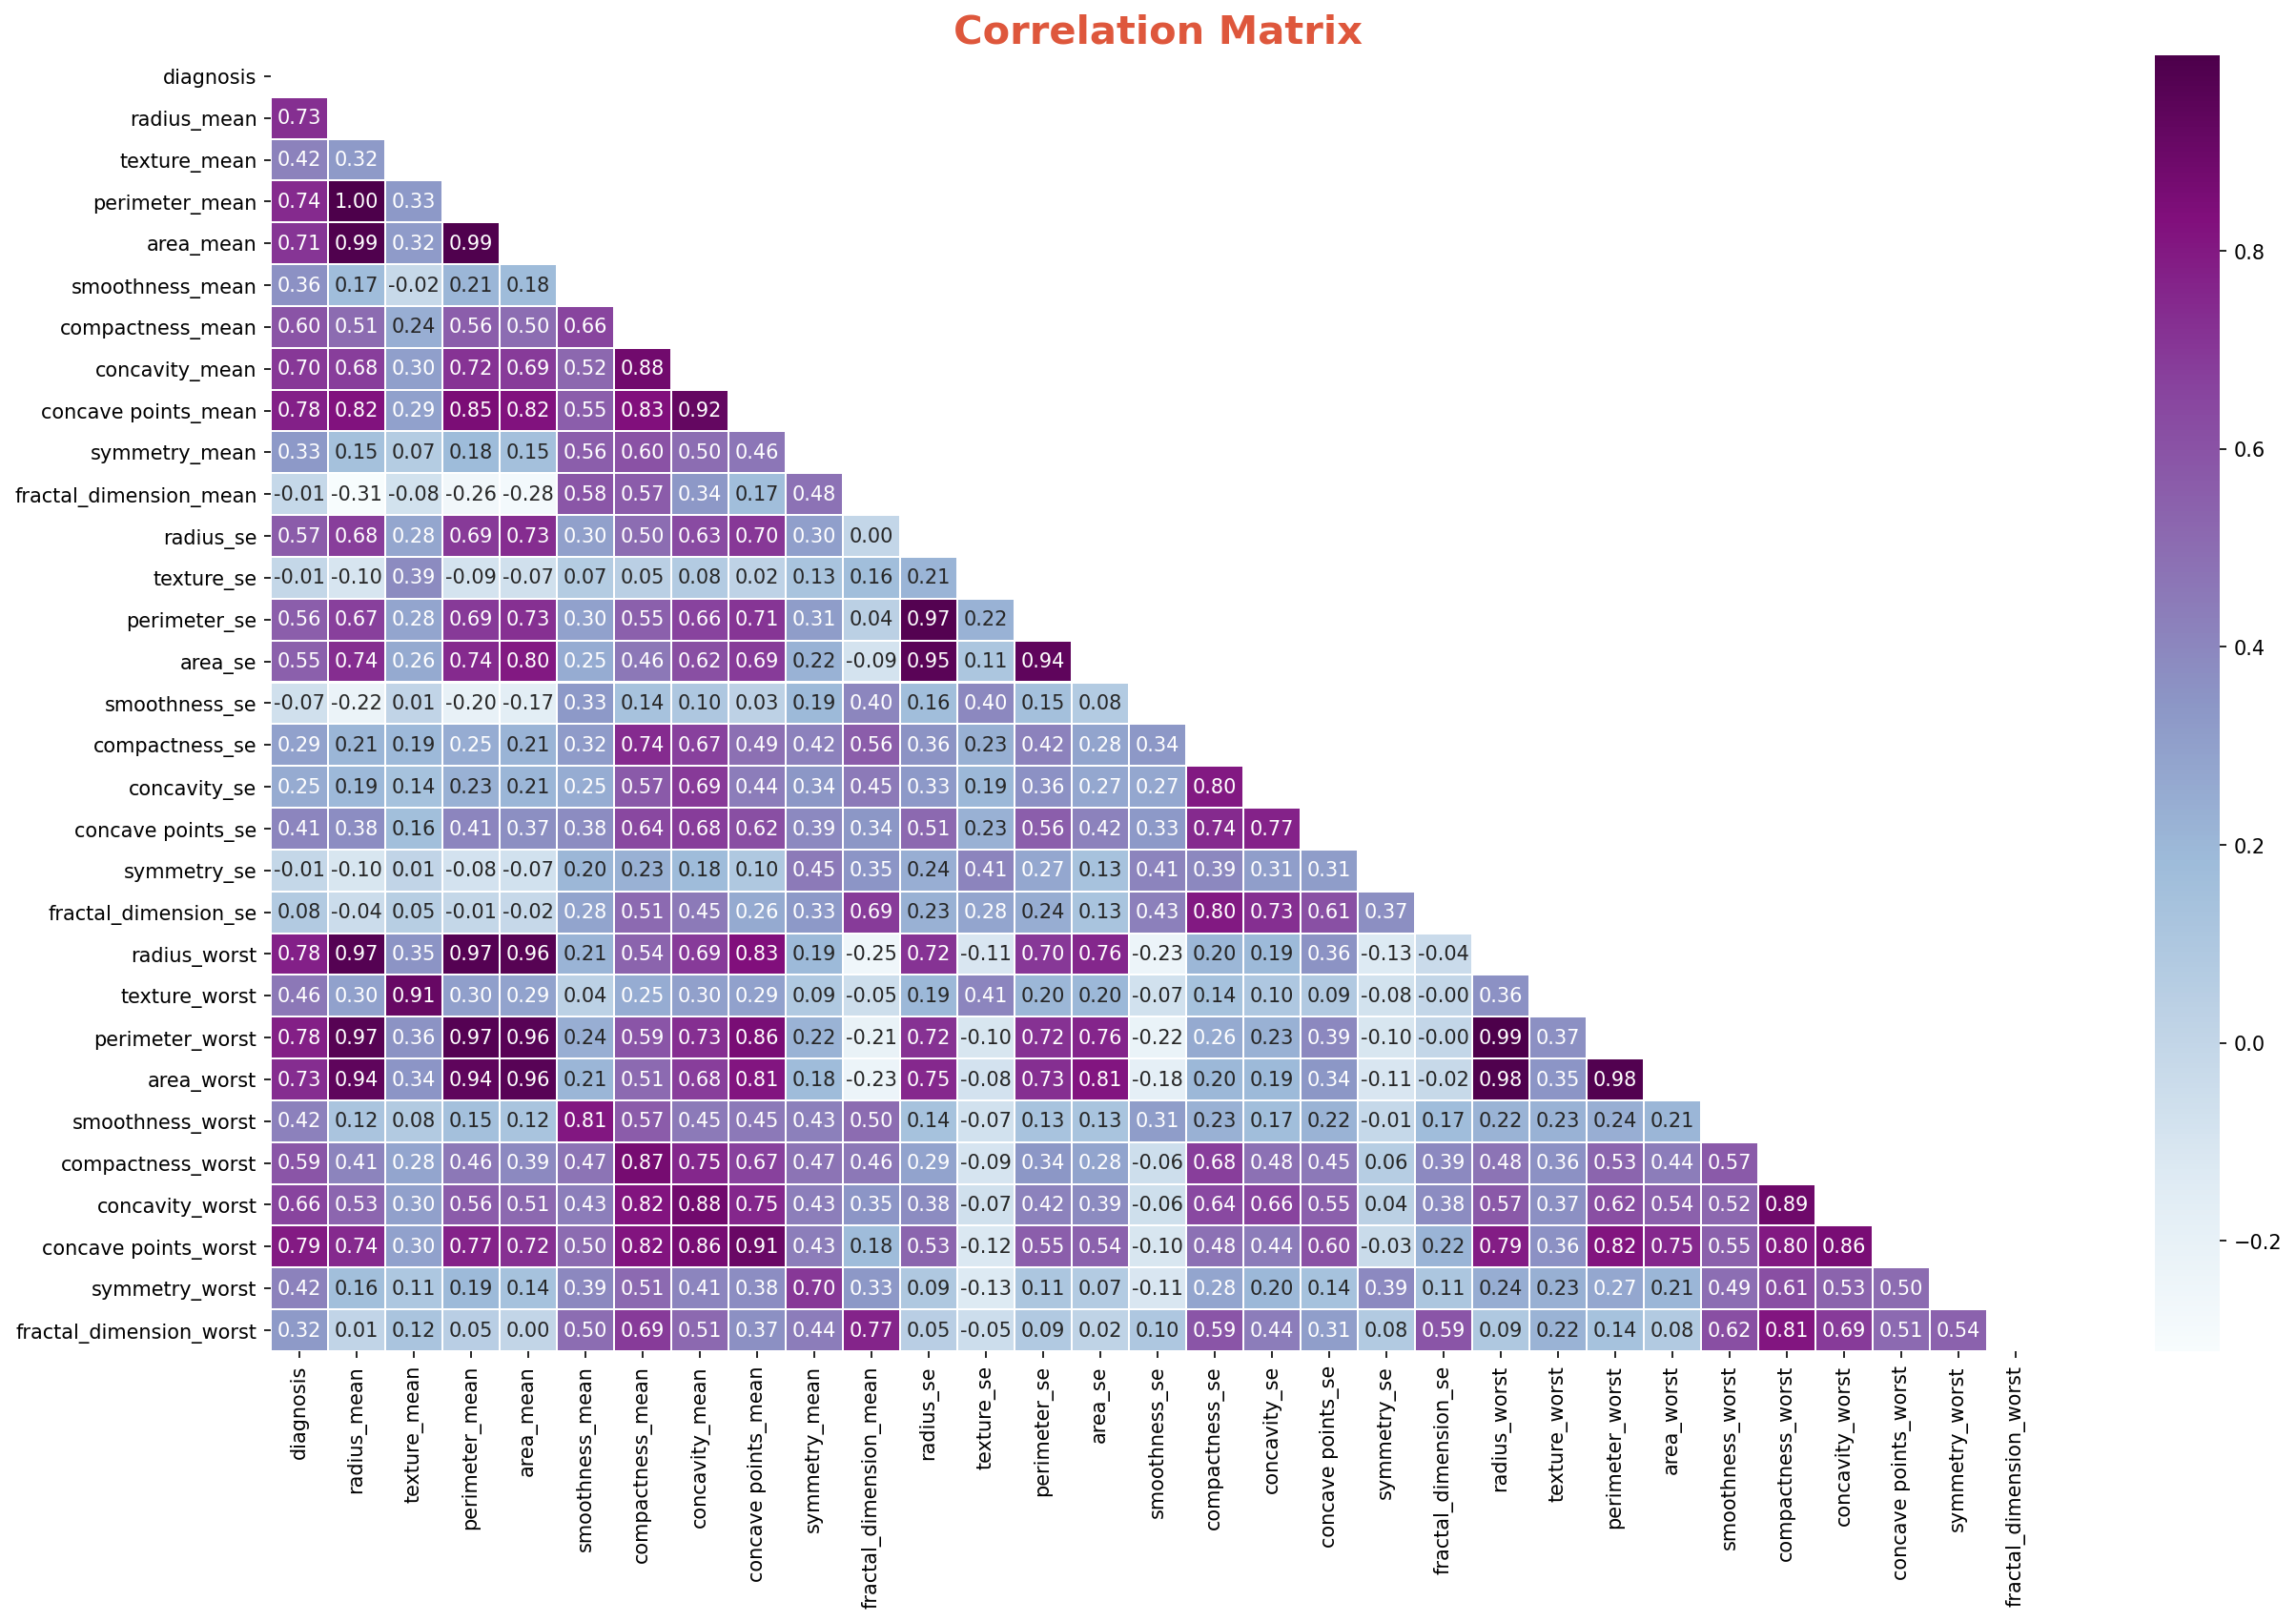

In [24]:
plt.figure(figsize = (20, 12), dpi = 150)

corr = cancer.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr,
            mask = mask,
            cmap = 'BuPu',
            annot = True,
            linewidths = 0.5,
            fmt = ".2f")

plt.title('Correlation Matrix',
          fontsize = 20,
          weight = 'semibold',
          color = '#de573c')
plt.show()